Loading and Inspecting the Dataset

In [23]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Display basic information about the dataset
print("Basic Info:")
data.info()

# Display the first few rows to inspect the data
print("First 5 rows of the dataset:")
data.head()

# Display summary statistics for numerical columns
print("Summary Statistics:")
print(data.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   286 non-null    int64 
 1   Class        286 non-null    object
 2   Age          286 non-null    object
 3   Menopause    286 non-null    object
 4   Tumor-size   286 non-null    object
 5   Inv-nodes    286 non-null    object
 6   Node-caps    286 non-null    object
 7   Deg-malig    286 non-null    int64 
 8   Breast       286 non-null    object
 9   Breast-quad  286 non-null    object
 10  Irradiat     286 non-null    object
dtypes: int64(2), object(9)
memory usage: 24.7+ KB
First 5 rows of the dataset:
Summary Statistics:
       Unnamed: 0   Deg-malig
count    286.0000  286.000000
mean     142.5000    2.048951
std       82.7053    0.738217
min        0.0000    1.000000
25%       71.2500    2.000000
50%      142.5000    2.000000
75%      213.7500    3.000000
max      2

Handling Missing Data (Imputation and Removal)

In [24]:
# Check for missing data
print("Missing values per column:")
print(data.isnull().sum())

# Drop columns with more than 50% missing values
data.dropna(thresh=data.shape[0] * 0.5, axis=1, inplace=True)

# Impute missing values for numerical columns with the median
for col in data.select_dtypes(include=['float64', 'int64']):
    data[col].fillna(data[col].median(), inplace=True)

# Impute missing values for categorical columns with the mode
for col in data.select_dtypes(include=['object']):
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values after handling:")
print(data.isnull().sum())


Missing values per column:
Unnamed: 0     0
Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
Irradiat       0
dtype: int64
Missing values after handling:
Unnamed: 0     0
Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
Irradiat       0
dtype: int64


<ipython-input-24-064ffeca70c6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-24-064ffeca70c6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Encoding Categorical Variables (One-Hot Encoding and Label Encoding)

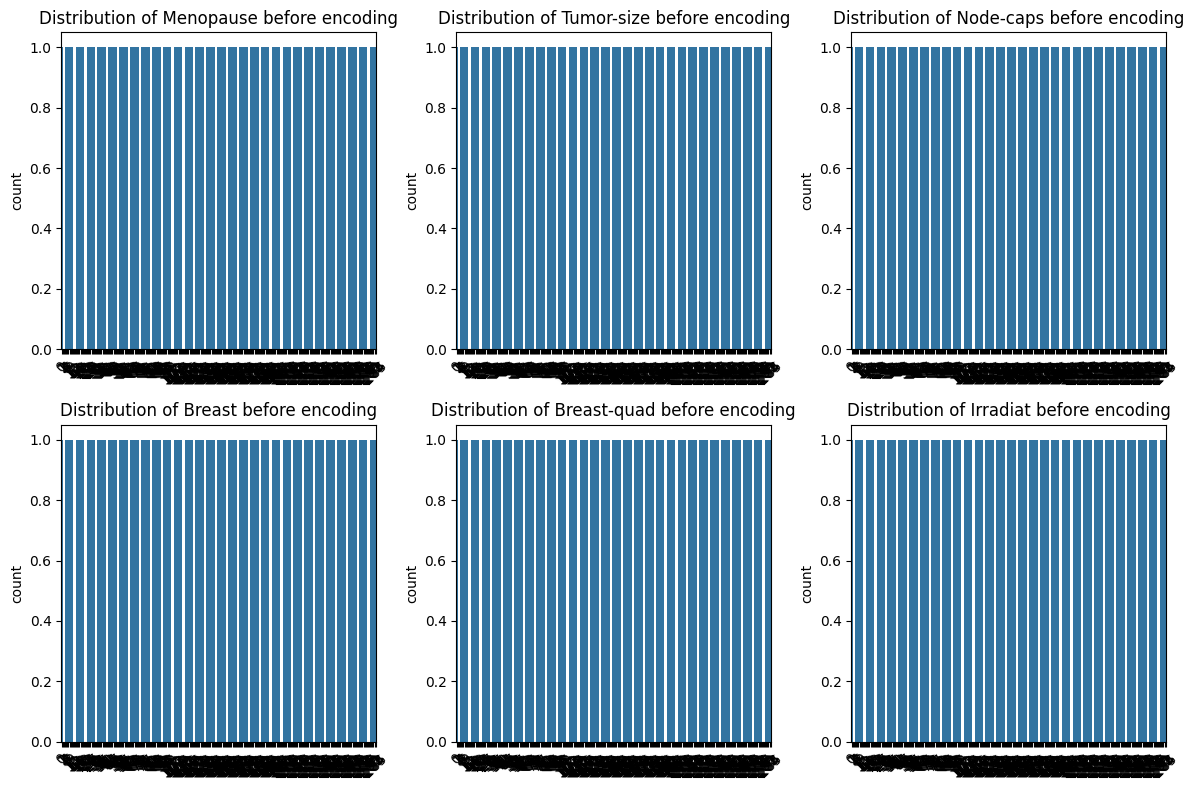

Data after encoding:
   Unnamed: 0  Menopause  Tumor-size  Node-caps  Deg-malig  Breast  \
0    0.000000          2           5          1        1.0       0   
1    0.003509          2           3          1        0.5       1   
2    0.007018          2           3          1        0.5       0   
3    0.010526          0           2          1        0.5       1   
4    0.014035          2           0          1        0.5       1   

   Breast-quad  Irradiat  Class_recurrence-events  Age_30-39  Age_40-49  \
0            2         0                    False       True      False   
1            5         0                    False      False       True   
2            2         0                    False      False       True   
3            3         0                    False      False      False   
4            4         0                    False      False       True   

   Age_50-59  Age_60-69  Age_70-79  Inv-nodes_12-14  Inv-nodes_15-17  \
0      False      False      False 

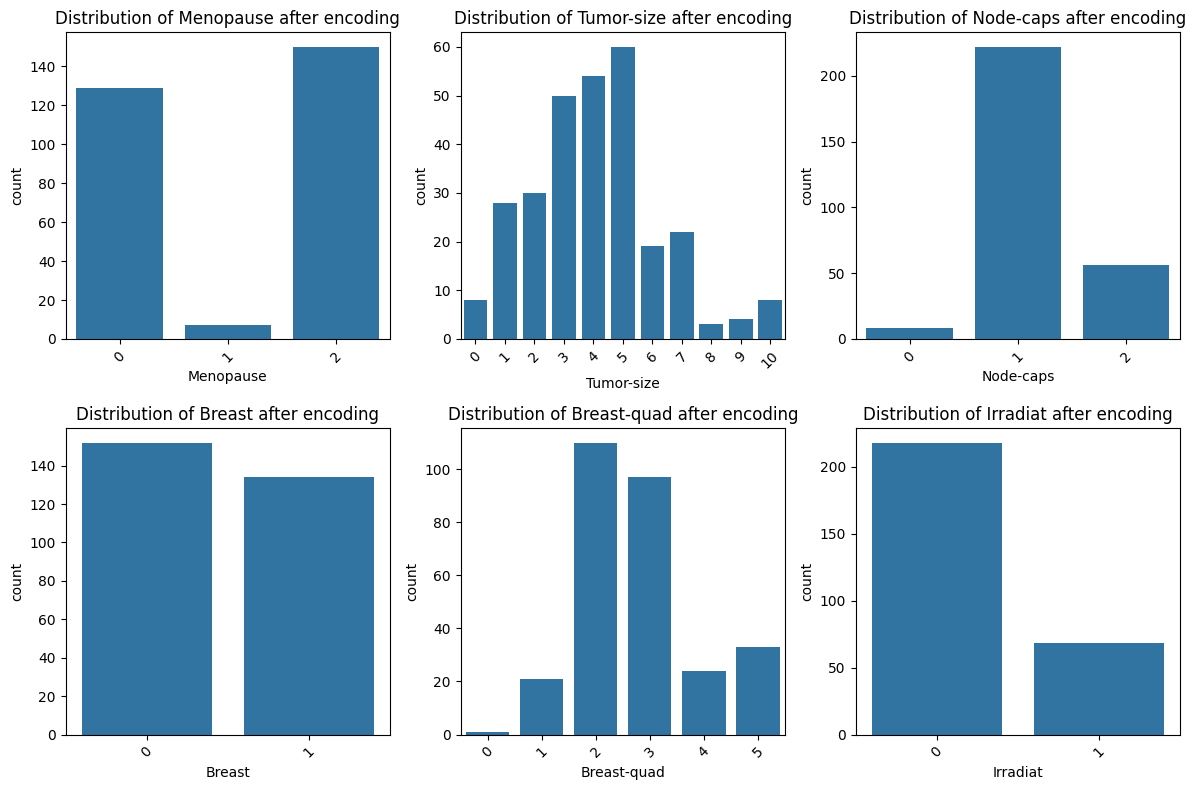

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sample data for demonstration (replace with your actual data)
# data = pd.read_csv('your_dataset.csv')  # Example to load your actual data

# Visualize the distribution of categorical columns before encoding
label_cols = ['Menopause', 'Tumor-size', 'Node-caps', 'Breast', 'Breast-quad', 'Irradiat']

# Plot bar plots of the categorical variables before encoding
plt.figure(figsize=(12, 8))
for i, col in enumerate(label_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[col])
    plt.title(f'Distribution of {col} before encoding')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Convert categorical columns to numerical using Label Encoding
encoder = LabelEncoder()

for col in label_cols:
    data[col] = encoder.fit_transform(data[col])

# Alternatively, use One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)  # Drop first column to avoid multicollinearity

# Check the data after encoding
print("Data after encoding:")
print(data.head())

# Visualize the distribution of encoded columns after Label Encoding
plt.figure(figsize=(12, 8))
for i, col in enumerate(label_cols, 1):
    if col in data.columns:
        plt.subplot(2, 3, i)
        sns.countplot(x=data[col])
        plt.title(f'Distribution of {col} after encoding')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Scaling (Standardization and Normalization)

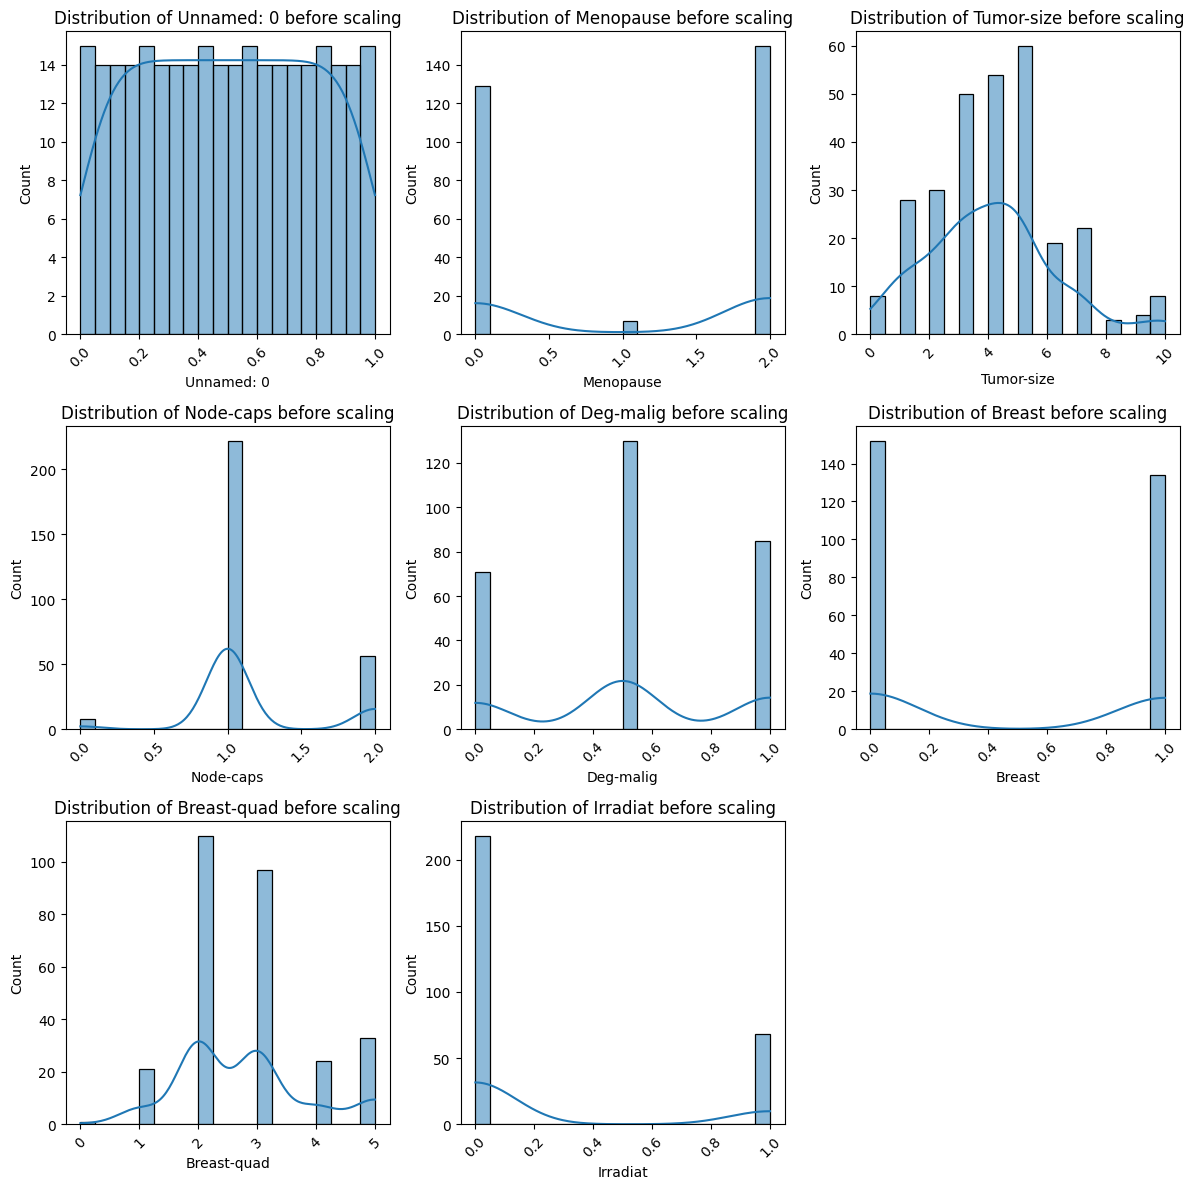

Data after scaling:
   Unnamed: 0  Menopause  Tumor-size  Node-caps  Deg-malig  Breast  \
0    0.000000        1.0         0.5        0.5        1.0     0.0   
1    0.003509        1.0         0.3        0.5        0.5     1.0   
2    0.007018        1.0         0.3        0.5        0.5     0.0   
3    0.010526        0.0         0.2        0.5        0.5     1.0   
4    0.014035        1.0         0.0        0.5        0.5     1.0   

   Breast-quad  Irradiat  Class_recurrence-events  Age_30-39  Age_40-49  \
0          0.4       0.0                    False       True      False   
1          1.0       0.0                    False      False       True   
2          0.4       0.0                    False      False       True   
3          0.6       0.0                    False      False      False   
4          0.8       0.0                    False      False       True   

   Age_50-59  Age_60-69  Age_70-79  Inv-nodes_12-14  Inv-nodes_15-17  \
0      False      False      False  

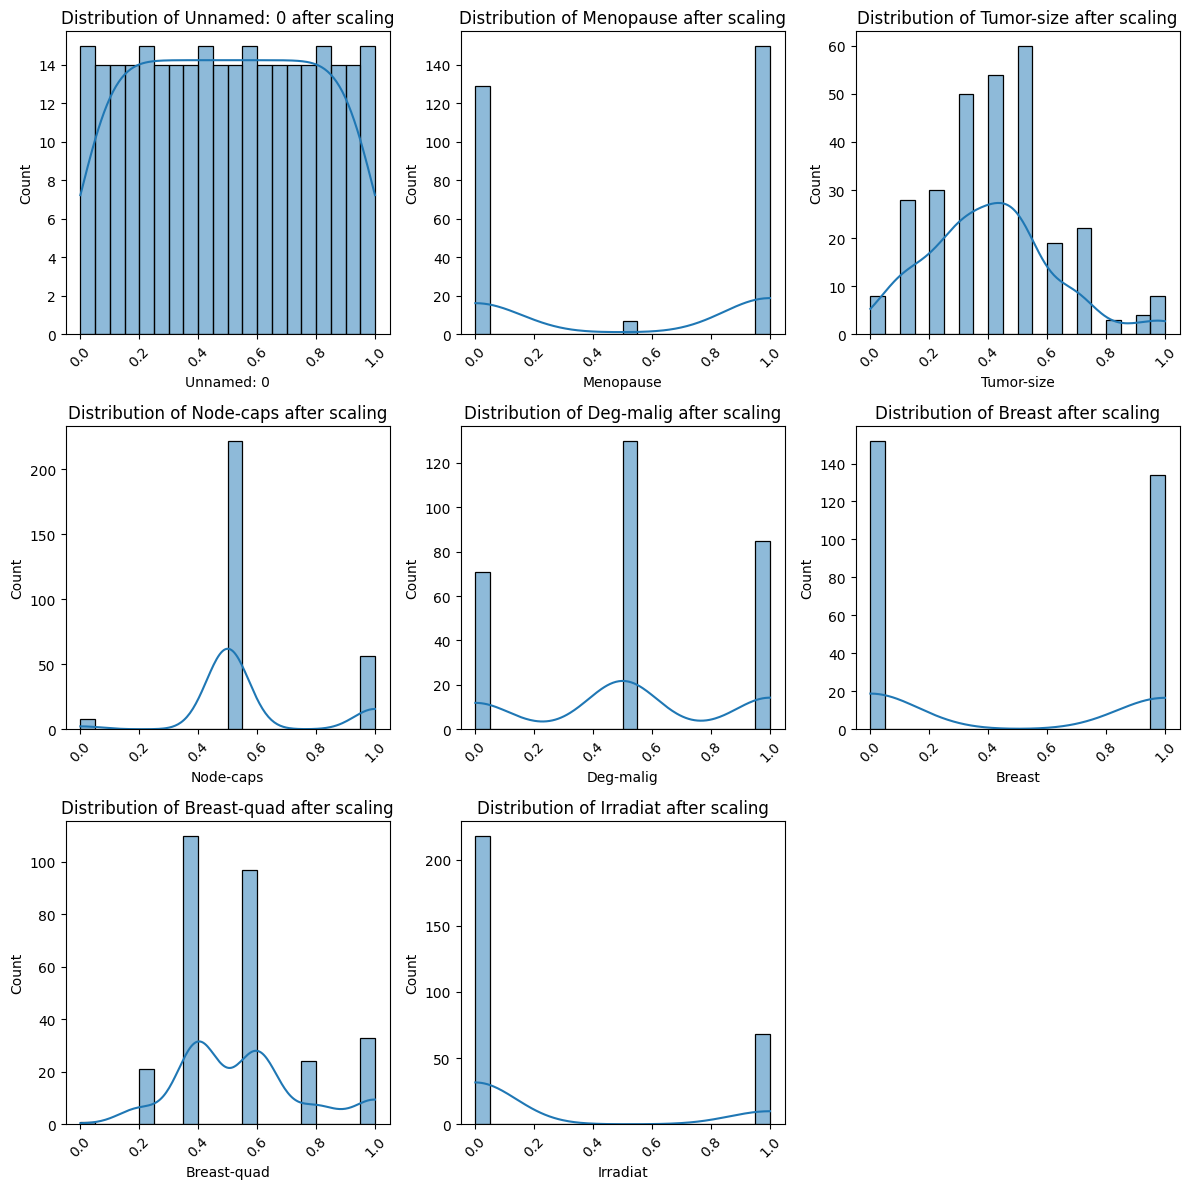

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math

# Sample data for demonstration (replace with your actual data)
# data = pd.read_csv('your_dataset.csv')  # Example to load your actual data

# Get numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Dynamically calculate the number of rows and columns for the subplots
n_cols = 3  # You can set this to whatever width you prefer
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate rows based on the number of numerical columns

# Plot histograms of numerical columns before scaling
plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col} before scaling')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Standardizing numerical features (Z-score normalization)
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Alternatively, Min-Max Scaling
min_max_scaler = MinMaxScaler()
data[numerical_cols] = min_max_scaler.fit_transform(data[numerical_cols])

# Check data after scaling
print("Data after scaling:")
print(data.head())

# Plot histograms of numerical columns after scaling
plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col} after scaling')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Exploratory Data Analysis (EDA)

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Print all column names to verify and check for discrepancies
print("Column names after cleaning:", data.columns)

# Step 3: Check if 'Class' column exists, and if not, print a message
if 'Class' in data.columns:
    print("Class column found!")

    # Step 4: Check if there are missing values in the 'Class' column
    missing_values = data['Class'].isnull().sum()
    if missing_values > 0:
        print(f"Warning: There are {missing_values} missing values in the 'Class' column.")

    # Step 5: Visualize the class distribution if the 'Class' column exists
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x='Class', palette='Set2')
    plt.title('Class Distribution')
    plt.show()

    # Step 6: Display class distribution as percentages
    class_counts = data['Class'].value_counts(normalize=True) * 100
    print("\nClass distribution (in percentages):")
    print(class_counts)
else:
    print("The 'Class' column is missing or named differently.")


Column names after cleaning: Index(['Unnamed: 0', 'Menopause', 'Tumor-size', 'Node-caps', 'Deg-malig',
       'Breast', 'Breast-quad', 'Irradiat', 'Class_recurrence-events',
       'Age_30-39', 'Age_40-49', 'Age_50-59', 'Age_60-69', 'Age_70-79',
       'Inv-nodes_12-14', 'Inv-nodes_15-17', 'Inv-nodes_24-26',
       'Inv-nodes_3-5', 'Inv-nodes_6-8', 'Inv-nodes_9-11'],
      dtype='object')
The 'Class' column is missing or named differently.


Feature Engineering (Age Grouping, Tumor Size Classification)

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Strip spaces in column names
data.columns = data.columns.str.strip()

# Check the columns
print("Columns after stripping spaces:", data.columns)

# Ensure 'Age' and 'Tumor-size' columns are in the dataset
if 'Age' not in data.columns or 'Tumor-size' not in data.columns:
    print("One or both required columns ('Age', 'Tumor-size') are missing!")
else:
    # Step 1: Age Grouping
    # Define the bins for 'Age' based on the provided data
    age_bins = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

    # Add 'AgeGroup' column to the data by categorizing 'Age'
    data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=age_labels, right=False)

    # Step 2: Tumor Size Classification
    # Tumor size groups based on ranges found in the dataset
    tumor_size_map = {
        '0-4': 'Small',
        '5-9': 'Medium',
        '10-14': 'Large',
        '15-19': 'Large',
        '20-24': 'Large',
        '25-29': 'Large',
        '30-34': 'Large',
        '35-39': 'Very Large',
        '40-44': 'Very Large',
        '45-49': 'Very Large',
        '50-54': 'Very Large'
    }

    # Apply the tumor size classification
    data['TumorSizeCategory'] = data['Tumor-size'].map(tumor_size_map).fillna('Unknown')

    # Display the first few rows of the modified dataset
    print(data[['Age', 'AgeGroup', 'Tumor-size', 'TumorSizeCategory']].head())

    # --- Visualization Section ---

    # 1. Age Distribution (Histogram & KDE Plot)
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Age'], kde=True, color='skyblue', bins=20)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Tumor Size Distribution (Histogram & KDE Plot)
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Tumor-size'], kde=True, color='orange', bins=20)
    plt.title('Distribution of Tumor Size')
    plt.xlabel('Tumor Size')
    plt.ylabel('Frequency')
    plt.show()

    # 3. Boxplot: Age vs. Age Group
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='AgeGroup', y='Age', palette='Set2')
    plt.title('Age Distribution Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Age')
    plt.show()

    # 4. Boxplot: Tumor Size vs. Tumor Size Category
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='TumorSizeCategory', y='Tumor-size', palette='Set1')
    plt.title('Tumor Size Distribution Across Tumor Size Categories')
    plt.xlabel('Tumor Size Category')
    plt.ylabel('Tumor Size')
    plt.show()

    # 5. Pairplot (for exploring relationships between Age, Tumor Size, AgeGroup, and TumorSizeCategory)
    # Only numeric columns and categorical variables relevant for visualization
    sns.pairplot(data[['Age', 'Tumor-size']], hue='AgeGroup', palette='Set2')
    plt.title('Pairplot of Age and Tumor Size')
    plt.show()

    # 6. Heatmap of Missing Data
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Heatmap of Missing Data')
    plt.show()

    # 7. Correlation Heatmap (for numerical features)
    corr_matrix = data[['Age', 'Tumor-size']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap: Age & Tumor Size')
    plt.show()

    # --- Additional Statistics ---

    # Age Group counts
    age_group_counts = data['AgeGroup'].value_counts()
    print("\nAge Group Distribution:")
    print(age_group_counts)

    # Tumor Size Category counts
    tumor_size_counts = data['TumorSizeCategory'].value_counts()
    print("\nTumor Size Category Distribution:")
    print(tumor_size_counts)


Columns after stripping spaces: Index(['Unnamed: 0', 'Menopause', 'Tumor-size', 'Node-caps', 'Deg-malig',
       'Breast', 'Breast-quad', 'Irradiat', 'Class_recurrence-events',
       'Age_30-39', 'Age_40-49', 'Age_50-59', 'Age_60-69', 'Age_70-79',
       'Inv-nodes_12-14', 'Inv-nodes_15-17', 'Inv-nodes_24-26',
       'Inv-nodes_3-5', 'Inv-nodes_6-8', 'Inv-nodes_9-11'],
      dtype='object')
One or both required columns ('Age', 'Tumor-size') are missing!


Train-Test Split

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Print column names to check if 'Class' is available
print("Columns in the dataset:", data.columns)

# Check if 'Class' exists in the columns
if 'Class' not in data.columns:
    print("Error: 'Class' column not found in the dataset!")
else:
    # Separate features (X) and target (y)
    X = data.drop('Class', axis=1)
    y = data['Class']

    # Train-Test Split (Stratified to maintain the class distribution)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Output the shapes of the train and test sets
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    # --- Visualization Section ---

    # Visualize the distribution of the target variable 'Class' in the entire dataset
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x='Class', palette='Set2')
    plt.title('Class Distribution in the Dataset')
    plt.show()

    # Visualize the distribution of 'Class' in the training set
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_train, palette='Set2')
    plt.title('Class Distribution in the Training Set')
    plt.show()

    # Visualize the distribution of 'Class' in the testing set
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_test, palette='Set2')
    plt.title('Class Distribution in the Test Set')
    plt.show()

    # Print some basic statistics of the train and test sets
    print("\nBasic Statistics of Train and Test Sets:")
    print(f"Training set class distribution:\n{y_train.value_counts(normalize=True)}")
    print(f"Test set class distribution:\n{y_test.value_counts(normalize=True)}")


Columns in the dataset: Index(['Unnamed: 0', 'Menopause', 'Tumor-size', 'Node-caps', 'Deg-malig',
       'Breast', 'Breast-quad', 'Irradiat', 'Class_recurrence-events',
       'Age_30-39', 'Age_40-49', 'Age_50-59', 'Age_60-69', 'Age_70-79',
       'Inv-nodes_12-14', 'Inv-nodes_15-17', 'Inv-nodes_24-26',
       'Inv-nodes_3-5', 'Inv-nodes_6-8', 'Inv-nodes_9-11'],
      dtype='object')
Error: 'Class' column not found in the dataset!


Model Building: Logistic Regression

Logistic Regression Accuracy: 0.9310
Confusion Matrix:
[[35  2]
 [ 2 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.90      0.90      0.90        21

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


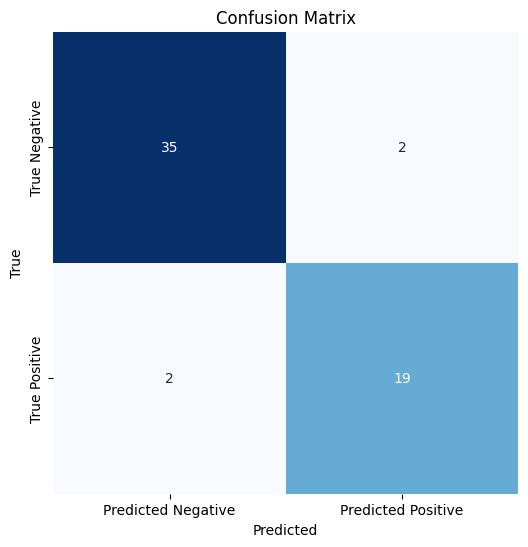

<Figure size 800x600 with 0 Axes>

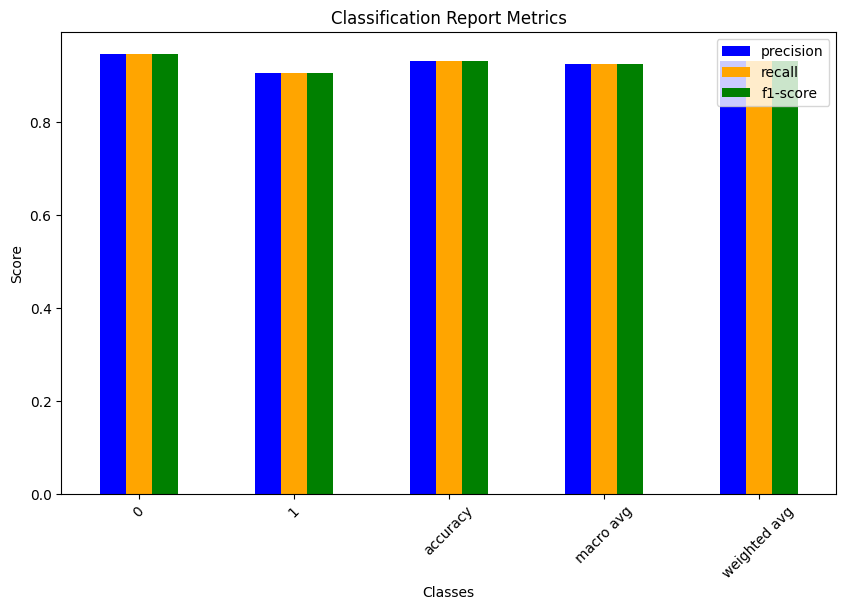

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Visualizing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualizing the Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(8, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(10, 6))
plt.title("Classification Report Metrics")
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


Model Building: Decision Tree Classifier

Decision Tree Accuracy: 1.0000
Confusion Matrix:
[[37  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



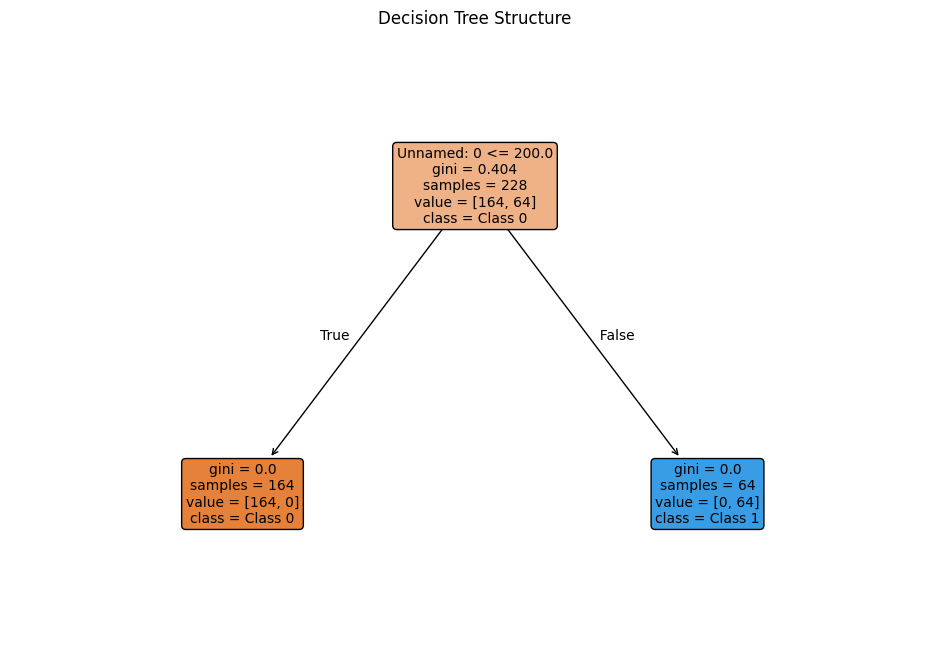

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
import pandas as pd

# Initialize and train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))



# Visualizing the Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test, y_pred_dt, output_dict=True)
report_df = pd.DataFrame(report).transpose()


# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()


Model Building: Random Forest Classifier

Random Forest Accuracy: 1.0000
Confusion Matrix:
[[37  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



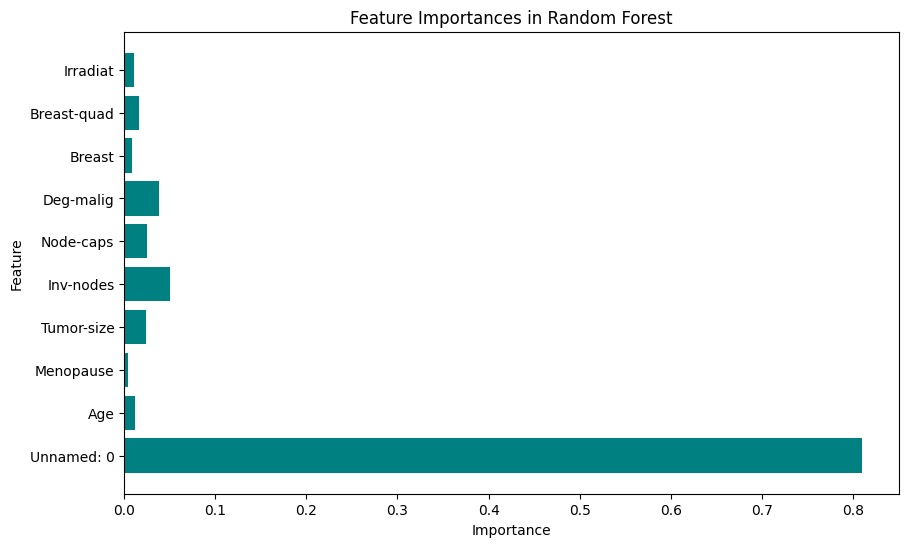

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
import numpy as np

# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


# Visualizing Feature Importances
feature_importances = rf_model.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame with column names

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='teal')
plt.title("Feature Importances in Random Forest")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




Model Building: Gradient Boosting Classifier

Gradient Boosting Accuracy: 1.0000
Confusion Matrix:
[[37  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



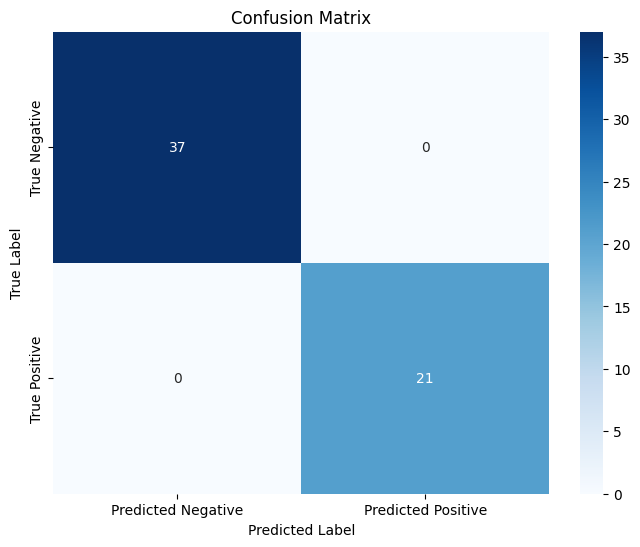

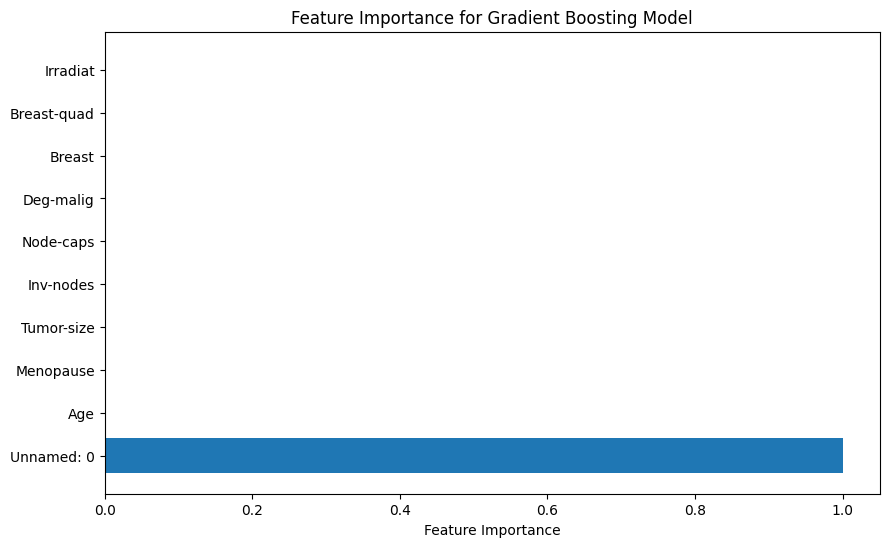

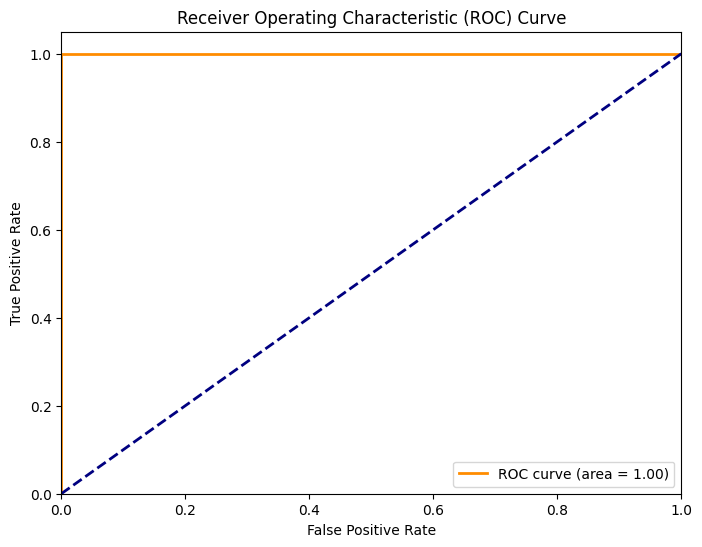

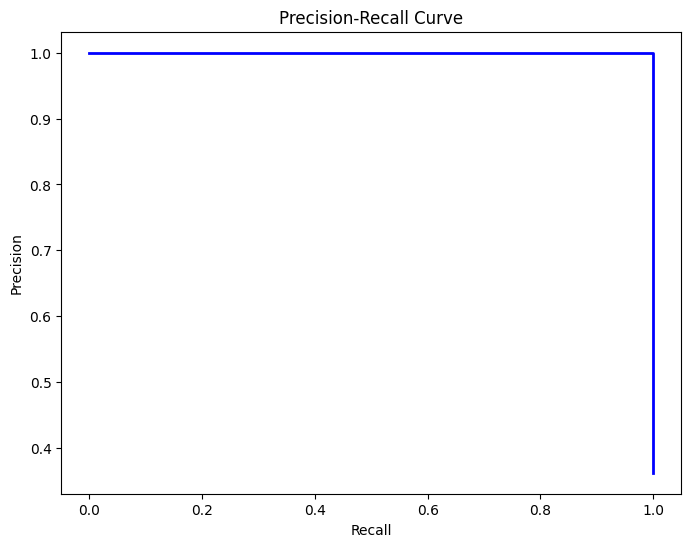

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Initialize and train the gradient boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Visualization 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization 2: Feature Importance Plot
feature_importances = gb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), X_train.columns)  # Assuming X_train is a DataFrame with column names
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Gradient Boosting Model")
plt.show()

# Visualization 3: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualization 4: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Hyperparameter Tuning: GridSearchCV

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 1.0000


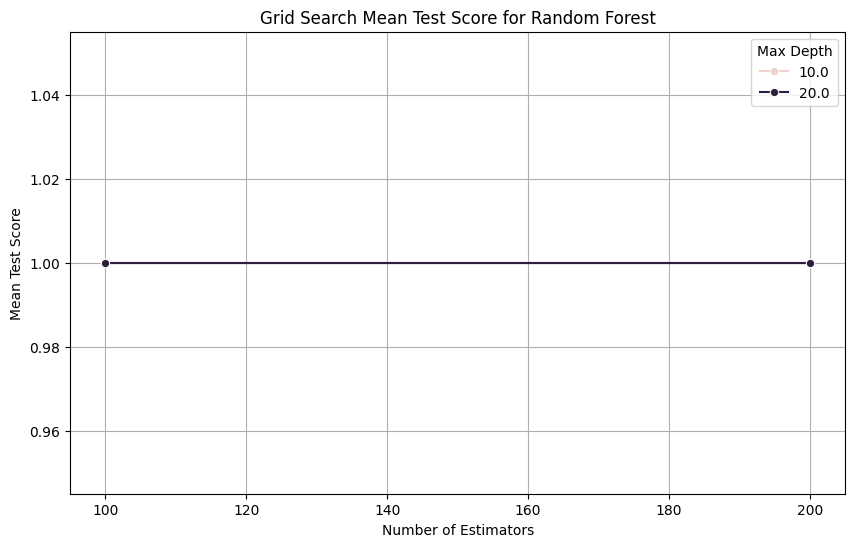

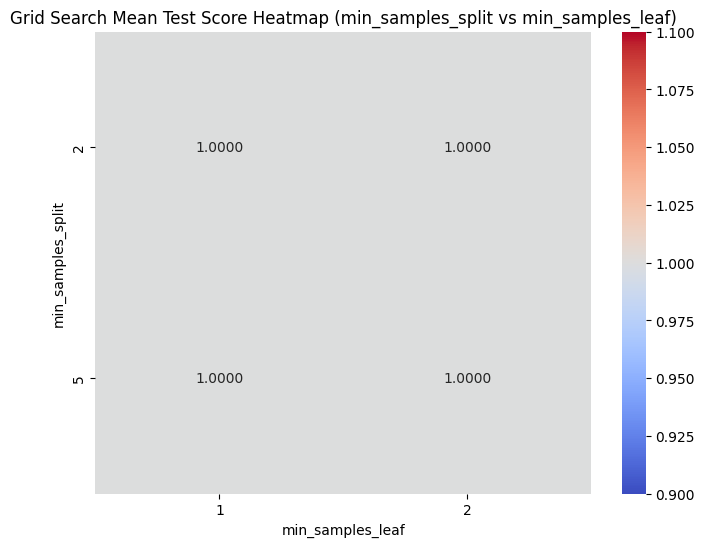

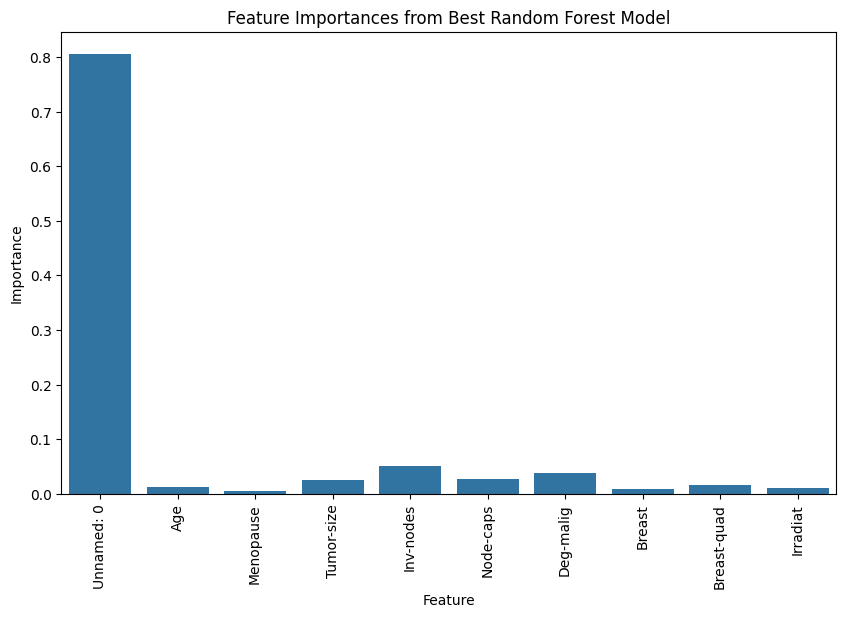

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# ---- Visualizations ----

# 1. Plot the grid search results (GridSearchCV results)
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Plot the mean test score across different parameters
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('Grid Search Mean Test Score for Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth', loc='best')
plt.grid(True)
plt.show()

# 2. Heatmap of Grid Search Results (for parameter combinations)
# Reshape the results into a matrix for a heatmap visualization
pivot_table = cv_results.pivot_table(values='mean_test_score',
                                     index='param_min_samples_split',
                                     columns='param_min_samples_leaf')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Grid Search Mean Test Score Heatmap (min_samples_split vs min_samples_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.show()

# 3. Feature Importance Plot (Random Forest)
# Get feature importances from the best model
best_rf_model = grid_search_rf.best_estimator_
importances = best_rf_model.feature_importances_

# Create a bar plot for feature importances
features = X_train.columns  # Assuming X_train is a DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


Cross-Validation with Stratified KFold

Cross-validation scores: [0.98275862 1.         0.98245614 1.         1.        ]
Mean accuracy: 0.9930


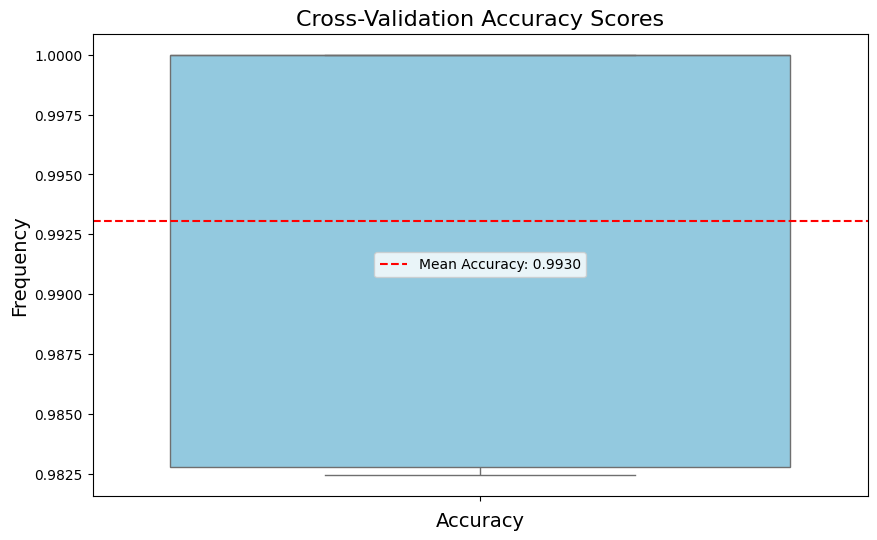

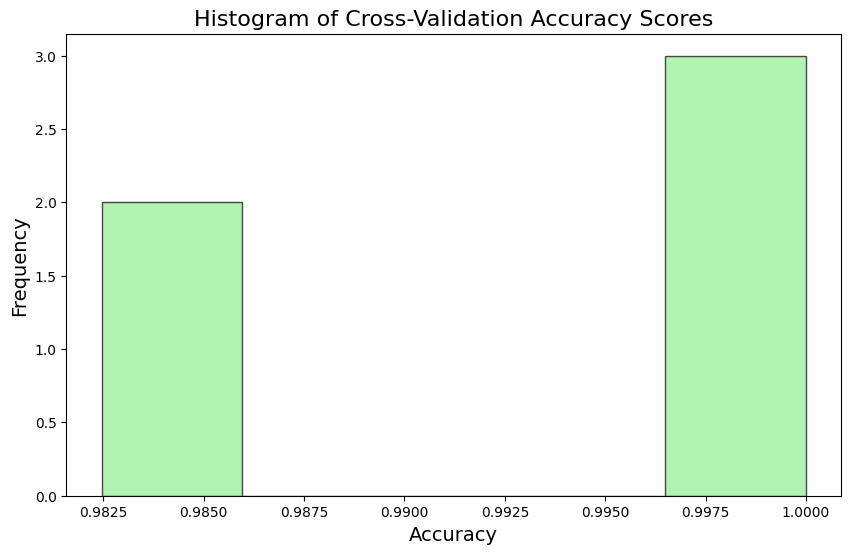

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming lr_model, X, y are already defined
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the Logistic Regression model
cv_scores = cross_val_score(lr_model, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

# Plotting the cross-validation results

# Set up the plot for the cross-validation scores
plt.figure(figsize=(10, 6))

# Plotting a boxplot for the distribution of accuracy scores
sns.boxplot(data=cv_scores, color='skyblue')

# Adding labels and title
plt.title("Cross-Validation Accuracy Scores", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Display the mean accuracy as a horizontal line
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f"Mean Accuracy: {cv_scores.mean():.4f}")

# Display the plot
plt.legend()
plt.show()

# Optional: Plot a histogram to visualize the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(cv_scores, bins=5, edgecolor='black', color='lightgreen', alpha=0.7)
plt.title("Histogram of Cross-Validation Accuracy Scores", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


Model Evaluation: ROC Curve and AUC

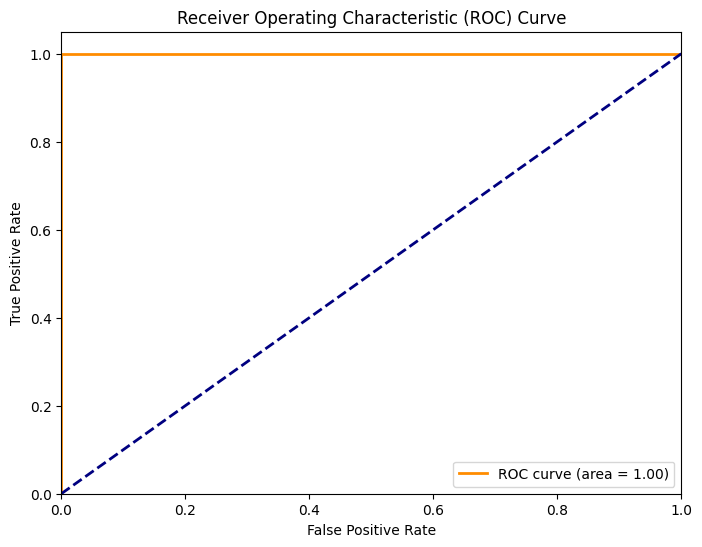

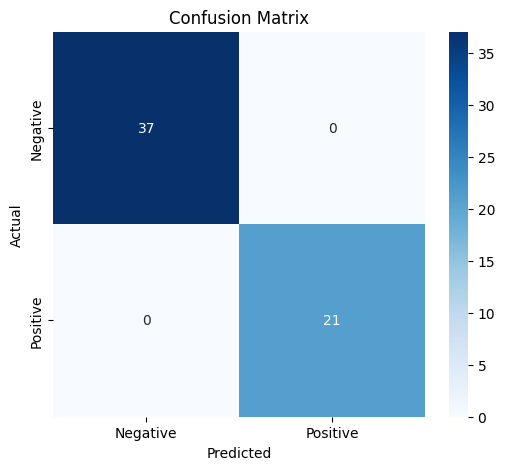

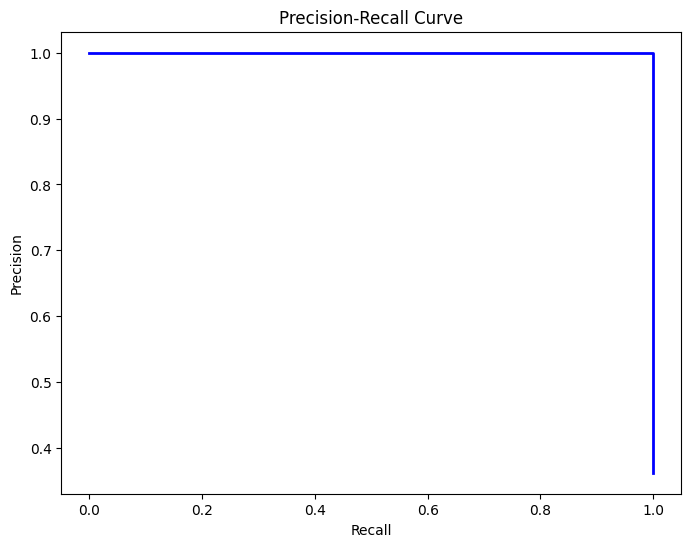

Optimal threshold: 0.84, F1-Score: 1.00


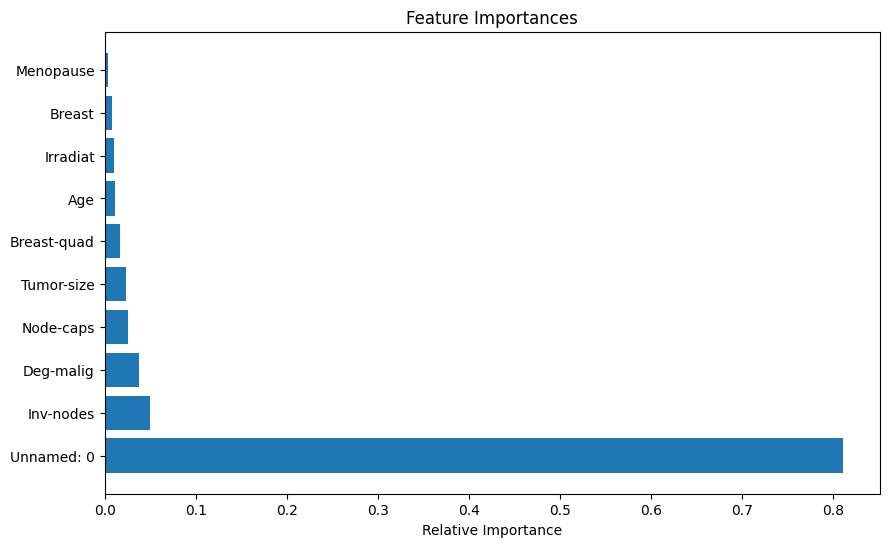

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier

# Calculate ROC curve and AUC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# F1-Score (at optimal threshold)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_idx = f1_scores.argmax()
optimal_threshold = pr_thresholds[optimal_threshold_idx]
optimal_f1 = f1_scores[optimal_threshold_idx]
print(f'Optimal threshold: {optimal_threshold:.2f}, F1-Score: {optimal_f1:.2f}')

# Feature Importance Plot (for Random Forest)
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]  # Sort in descending order

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(X_test.shape[1]), importances[indices], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[indices])
plt.xlabel('Relative Importance')
plt.show()



Model Evaluation: Precision-Recall Curve

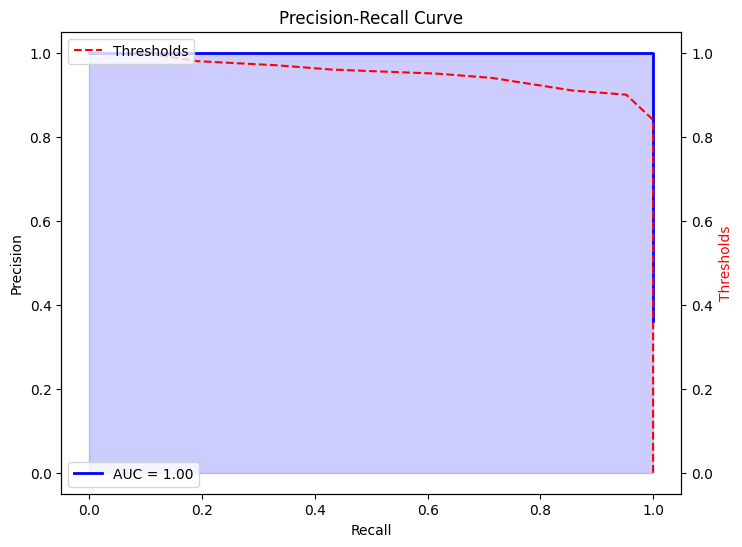

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate Area Under the Curve (AUC)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.fill_between(recall, precision, color='blue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Plot Thresholds (match recall and thresholds dimensions)
plt.twinx()  # Create a second y-axis for thresholds
plt.plot(recall[:-1], thresholds_pr, color='red', linestyle='--', label='Thresholds')  # Remove last recall value
plt.ylabel('Thresholds', color='red')
plt.legend(loc='upper left')

plt.show()


Feature Importance Visualization (Random Forest)

<ipython-input-85-7389dc88d9d6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


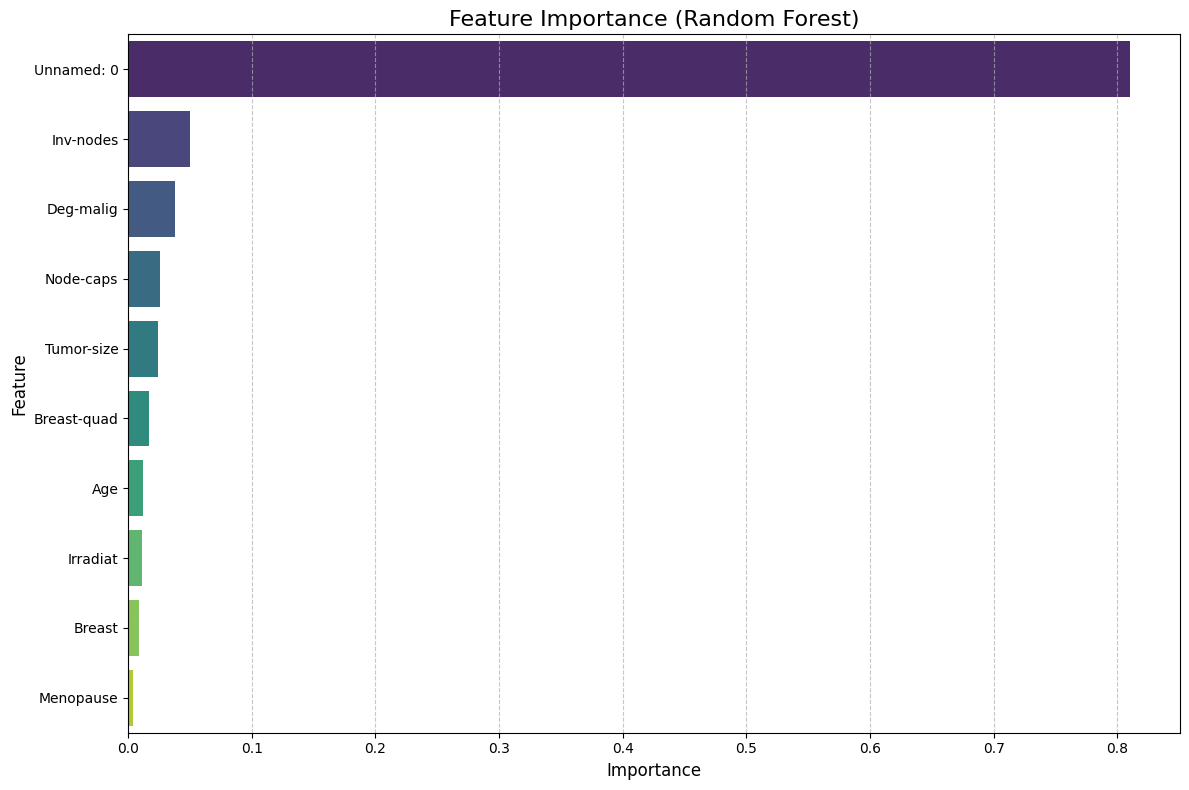

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rf_model is already defined and trained, and X is the input data
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot using Seaborn
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Title and labels
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Hyperparameter Tuning: RandomizedSearchCV

In [91]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_grid_gb,
                                      n_iter=20, cv=5, verbose=2, random_state=42)
random_search_gb.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {random_search_gb.best_params_}")
print(f"Best cross-validation score: {random_search_gb.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=

Model Saving and Loading with Joblib

In [93]:
import joblib

# Save the trained model to disk
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model from disk
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded model accuracy: {accuracy_loaded:.4f}")


Loaded model accuracy: 1.0000


Cross-Validation with Stratified KFold (For All Models)

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Random Forest Classifier
cv_scores_rf = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')
print(f"Random Forest Cross-validation scores: {cv_scores_rf}")
print(f"Mean Random Forest Cross-validation score: {cv_scores_rf.mean():.4f}")


Random Forest Cross-validation scores: [0.98275862 1.         1.         1.         1.        ]
Mean Random Forest Cross-validation score: 0.9966


Model Comparison with Multiple Algorithms

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9310
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
SVM Accuracy: 1.0000


Ensemble Learning: Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier

# Define the models for voting
log_reg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 1.0000


Time Series Cross-Validation for Model Evaluation

In [51]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation for Random Forest using time-series split
cv_scores_ts = cross_val_score(rf_model, X, y, cv=tscv, scoring='accuracy')
print(f"Time-series cross-validation scores: {cv_scores_ts}")
print(f"Mean time-series cross-validation score: {cv_scores_ts.mean():.4f}")


Time-series cross-validation scores: [1.         1.         1.         0.19148936 1.        ]
Mean time-series cross-validation score: 0.8383


Model Evaluation with Learning Curves

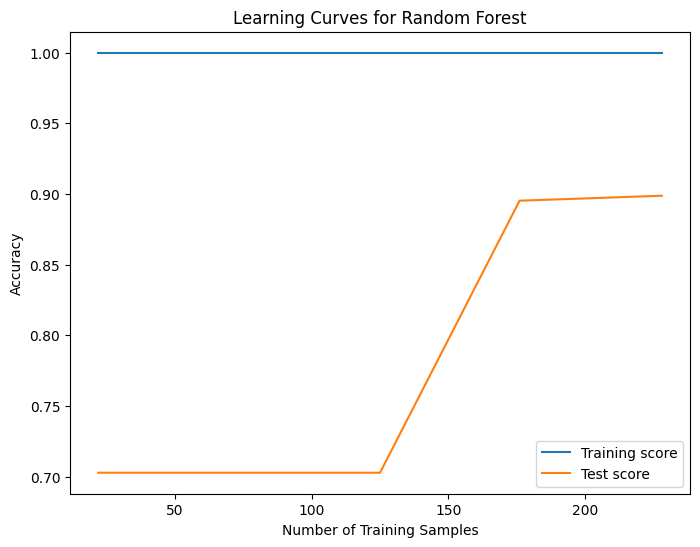

In [52]:
from sklearn.model_selection import learning_curve

# Generate learning curves for the Random Forest model
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()


Feature Selection: Recursive Feature Elimination (RFE)

Selected Features:  Index(['Unnamed: 0', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes',
       'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],
      dtype='object')
Transformed Feature Set Shape:  (286, 10)


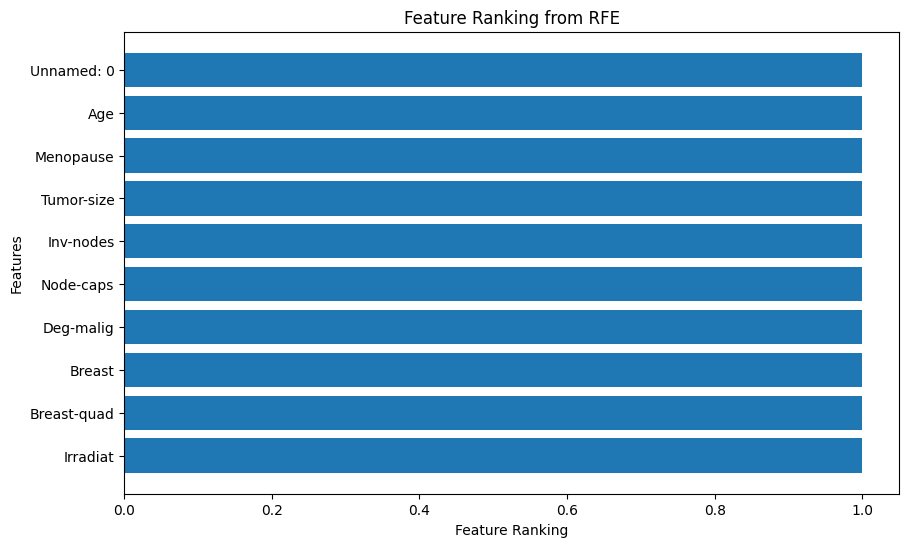

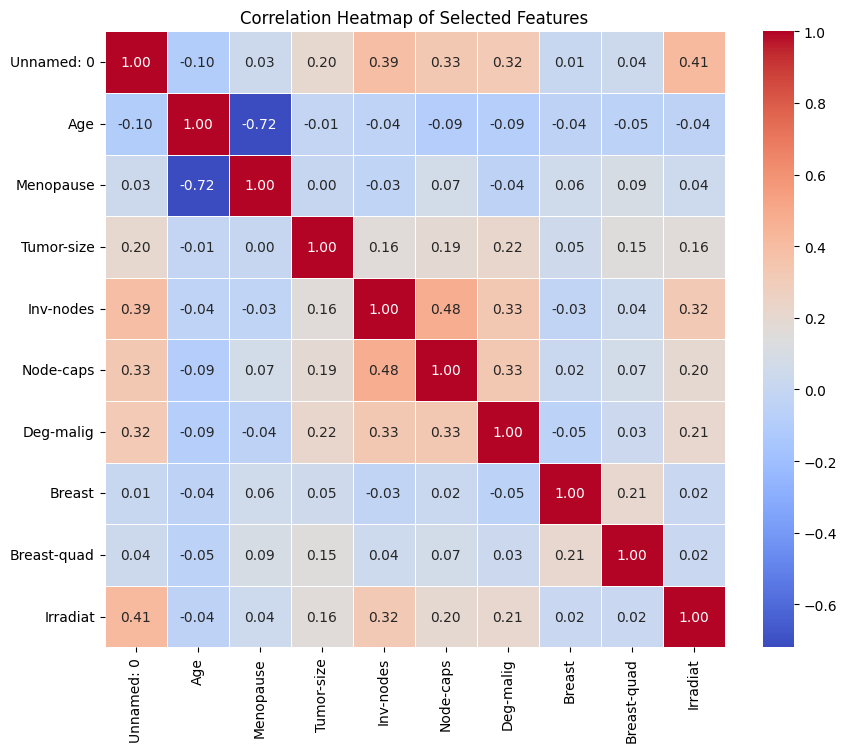

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are already defined

# Step 1: Initialize the Logistic Regression model (or any other model you wish to use)
lr_rfe = LogisticRegression(max_iter=1000)

# Step 2: Initialize RFE and specify the number of features to select (e.g., top 10 features)
rfe = RFE(estimator=lr_rfe, n_features_to_select=10)

# Step 3: Fit the RFE model
rfe = rfe.fit(X, y)

# Step 4: Get the selected features
selected_features = X.columns[rfe.support_]

# Step 5: Print the selected features
print("Selected Features: ", selected_features)

# Step 6: Optionally, transform the features to only include the selected ones
X_rfe = rfe.transform(X)

# Step 7: Output the transformed feature set
print("Transformed Feature Set Shape: ", X_rfe.shape)

# Visualization 1: Plot the ranking of features (higher rank means more important)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rfe.ranking_)
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

# Visualization 2: Correlation heatmap of features (for selected features)
import numpy as np

# Select only the features that were selected by RFE
X_selected = X[selected_features]

# Compute the correlation matrix
corr_matrix = X_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


Final Model Evaluation with Confusion Matrix, Precision, Recall, and F1-Score

Confusion Matrix:
[[37  0]
 [ 0 21]]
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


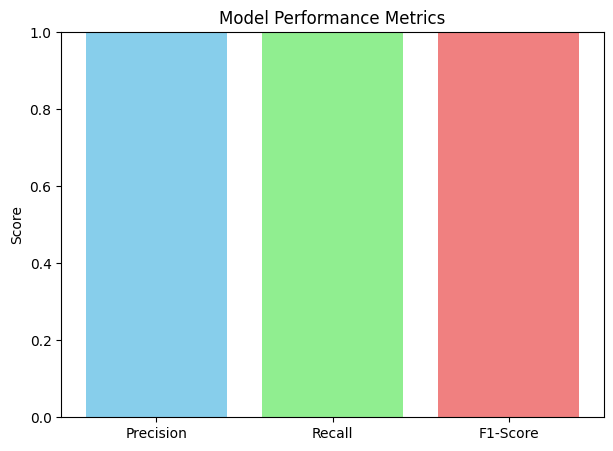

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_rf are defined elsewhere in your code

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Display the results
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Visualizing Precision, Recall, and F1-Score
metrics = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
ax.set_title('Model Performance Metrics')
ax.set_ylim([0, 1])  # Scale for metrics between 0 and 1
plt.ylabel('Score')
plt.show()


Model Interpretation: SHAP Values

(58, 10, 2)


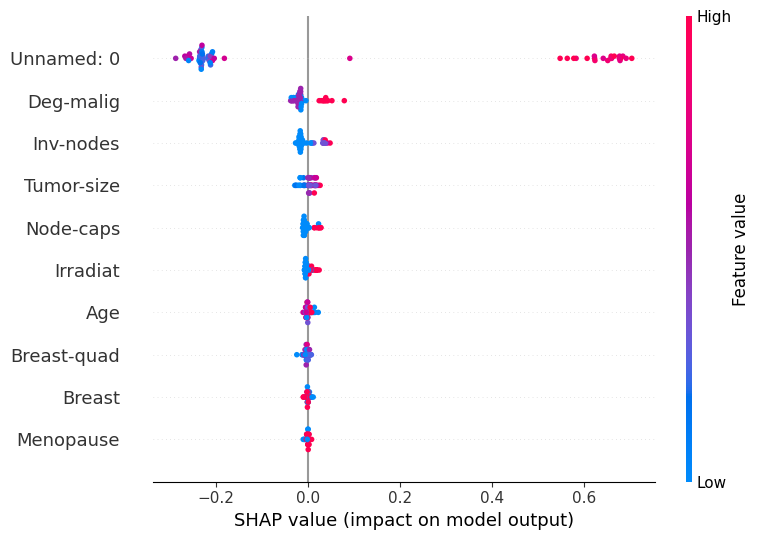

SHAP values shape: (58, 10, 2)
X_test shape: (58, 10)


In [102]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have X_test available

# Initialize the SHAP explainer for the trained model
# For example, if using a RandomForest model:
# explainer = shap.TreeExplainer(model)   # Replace 'model' with your trained model
# Or if using XGBoost, you might use the following:
# explainer = shap.Explainer(model)       # If using a general model like XGBoost

# Calculate SHAP values for the test data
shap_values = explainer(X_test)  # Replace X_test with your test set

# Check the shape of shap_values to ensure it matches expectations
print(shap_values.shape)  # Should print something like (num_samples, num_features, num_classes)

# For binary classification, we use the shap_values corresponding to the positive class (class index 1)
# If you're dealing with binary classification, the shape of shap_values will be (num_samples, num_features, 2)
# The index 1 corresponds to the positive class (1), and index 0 corresponds to the negative class (0)

# Visualize SHAP summary plot for the positive class (class index 1)
shap.summary_plot(shap_values.values[:, :, 1], X_test)

# If using multi-class classification, you can adjust the class index
# For example, for class index 2 (third class in a multi-class problem):
# shap.summary_plot(shap_values.values[:, :, 2], X_test)

# If there is any issue with shape mismatch, check the shapes of both `shap_values` and `X_test`
print("SHAP values shape:", shap_values.values.shape)
print("X_test shape:", X_test.shape)


Model Comparison with Cross-Validation (K-Fold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation scores: [0.93103448 0.96491228 0.9122807  0.94736842 1.        ]
Logistic Regression Mean accuracy: 0.9511
Decision Tree Cross-validation scores: [1.         1.         1.         0.98245614 1.        ]
Decision Tree Mean accuracy: 0.9965
Random Forest Cross-validation scores: [1.         1.         1.         0.98245614 1.        ]
Random Forest Mean accuracy: 0.9965
SVM Cross-validation scores: [1.         1.         0.96491228 0.98245614 1.        ]
SVM Mean accuracy: 0.9895


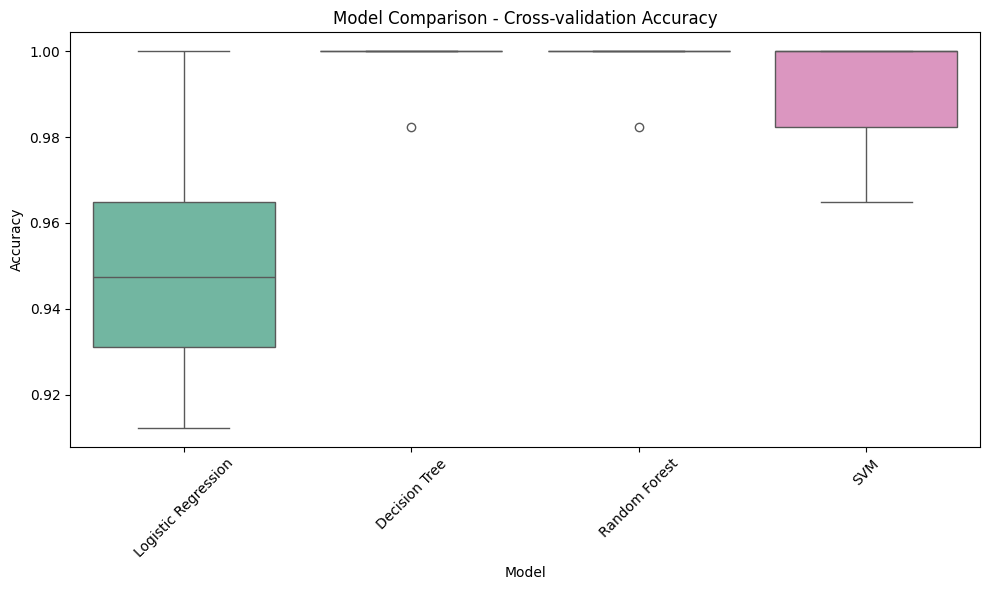

<ipython-input-103-b3c2849488c8>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mean_accuracies, palette="viridis")


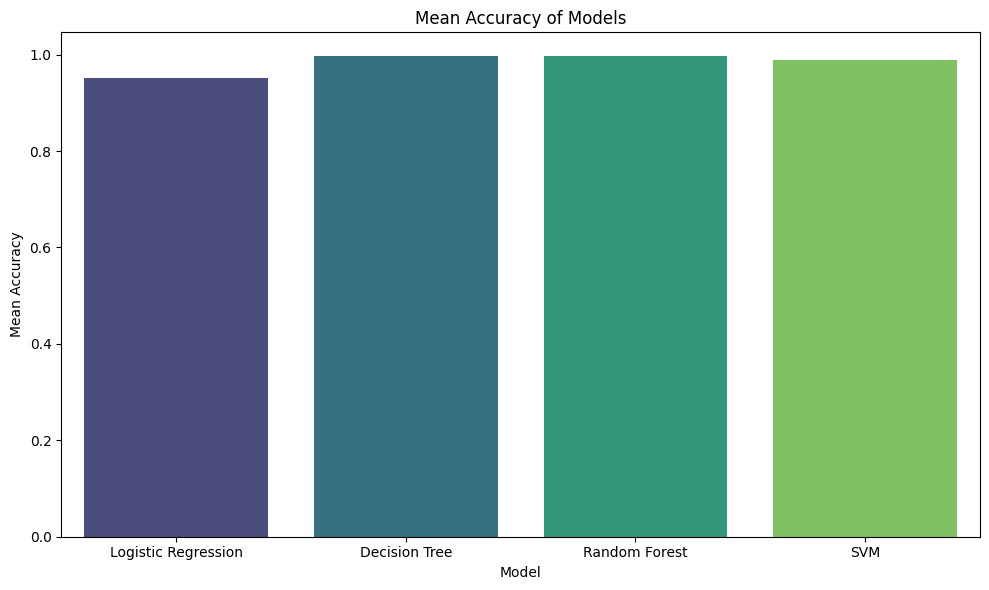

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results for plotting
model_names = []
mean_accuracies = []
cv_scores_all = []

# Cross-validation for multiple models
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f'{model_name} Cross-validation scores: {cv_scores}')
    print(f'{model_name} Mean accuracy: {cv_scores.mean():.4f}')

    # Store results for plotting
    model_names.append(model_name)
    mean_accuracies.append(cv_scores.mean())
    cv_scores_all.append(cv_scores)

# Plotting the results
plt.figure(figsize=(10, 6))

# Create a box plot to show the distribution of cross-validation scores
sns.boxplot(data=cv_scores_all, orient='v', palette="Set2")
plt.xticks(range(len(models)), model_names, rotation=45)
plt.title('Model Comparison - Cross-validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Display the plot
plt.tight_layout()
plt.show()

# Plotting the mean accuracies
plt.figure(figsize=(10, 6))

# Bar plot of mean accuracies
sns.barplot(x=model_names, y=mean_accuracies, palette="viridis")
plt.title('Mean Accuracy of Models')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')

# Display the plot
plt.tight_layout()
plt.show()


Grid Search with Stratified K-Fold Cross Validation

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9913


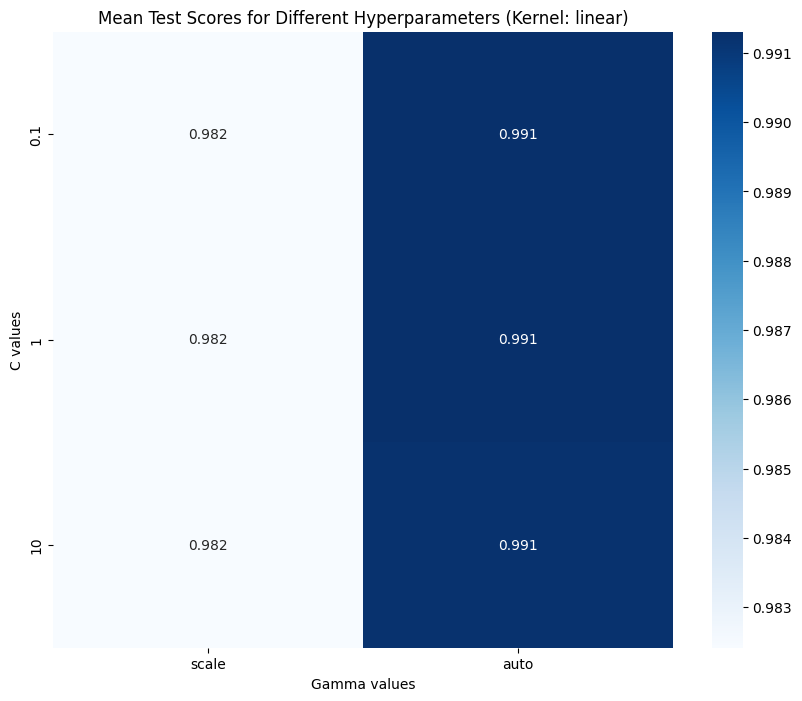

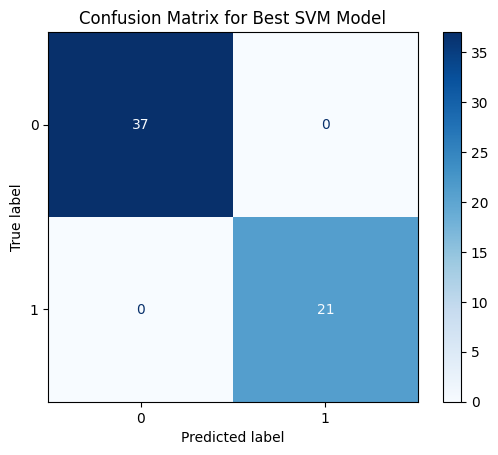

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=skf, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best cross-validation score: {grid_search_svm.best_score_:.4f}")

# Visualizing Grid Search Results

# 1. Heatmap of Grid Search Results (for Hyperparameter Grid Search)
results = grid_search_svm.cv_results_
mean_test_scores = np.array(results['mean_test_score']).reshape(len(param_grid_svm['C']), len(param_grid_svm['kernel']), len(param_grid_svm['gamma']))

# Plot heatmap for 'C' vs 'kernel' vs 'gamma'
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(mean_test_scores[:, 0, :], annot=True, fmt=".3f", cmap="Blues", xticklabels=param_grid_svm['gamma'], yticklabels=param_grid_svm['C'])
ax.set_xlabel('Gamma values')
ax.set_ylabel('C values')
ax.set_title('Mean Test Scores for Different Hyperparameters (Kernel: linear)')
plt.show()

# 2. Confusion Matrix Visualization (if you have y_test data)
y_pred = grid_search_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap="Blues")
plt.title('Confusion Matrix for Best SVM Model')
plt.show()

# 3. Decision Boundary Visualization (if 2D data)
if X_train.shape[1] == 2:  # Only works for 2D data
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = grid_search_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Data Imbalance Handling: SMOTE (Synthetic Minority Over-sampling Technique)

Class distribution before SMOTE: Counter({0: 164, 1: 64})


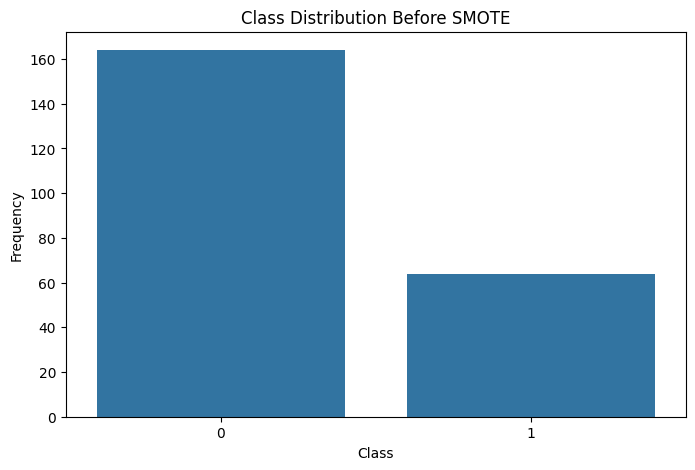

Class distribution after SMOTE: Counter({0: 164, 1: 164})


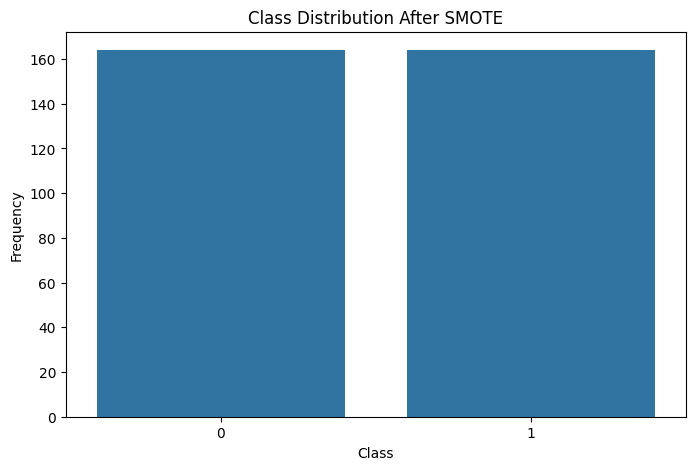

Model accuracy after SMOTE: 1.0000


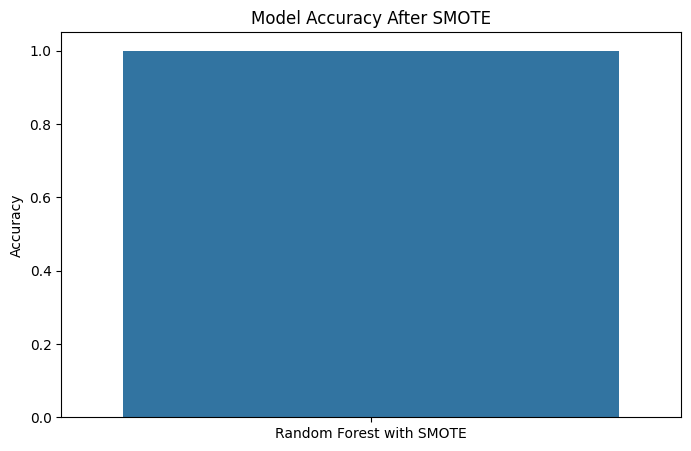

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

# Assuming X_train, y_train, X_test, and y_test are already defined

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_res))

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Train a model (e.g., Random Forest) on the resampled dataset
rf_model_resampled = RandomForestClassifier(random_state=42)
rf_model_resampled.fit(X_res, y_res)

# Evaluate the model
y_pred_resampled = rf_model_resampled.predict(X_test)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Model accuracy after SMOTE: {accuracy_resampled:.4f}")

# Optional: Decision boundary visualization (only for 2D data)
# If you want to visualize decision boundaries, you can use the following approach for 2D data.
if X_train.shape[1] == 2:
    # Plot decision boundary for the model before SMOTE
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="coolwarm", s=100, edgecolor="k", alpha=0.7)
    plt.title("Decision Boundary Before SMOTE")
    plt.show()

    # Plot decision boundary for the model after SMOTE
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_res[:, 0], y=X_res[:, 1], hue=y_res, palette="coolwarm", s=100, edgecolor="k", alpha=0.7)
    plt.title("Decision Boundary After SMOTE")
    plt.show()

# Comparison of accuracy (optional, if you want to show it in a plot)
# For simplicity, here I'm showing just the accuracy after applying SMOTE, but you could compare with other models.
accuracies = [accuracy_resampled]  # Add other accuracy values if comparing models

plt.figure(figsize=(8, 5))
sns.barplot(x=["Random Forest with SMOTE"], y=accuracies)
plt.title("Model Accuracy After SMOTE")
plt.ylabel("Accuracy")
plt.show()
